In [2]:
# AlexNet on Fashion-MNIST in Google Colab
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np, time
import matplotlib.pyplot as plt

In [3]:
# Check GPU
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))




TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Load dataset (only subset: 2000 train, 500 test)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Take subset
x_train, y_train = x_train[:2000], y_train[:2000]
x_test, y_test = x_test[:500], y_test[:500]

# Preprocess
x_train = np.expand_dims(x_train, -1) / 255.0
x_test = np.expand_dims(x_test, -1) / 255.0

# Resize to 224x224 (for AlexNet input)
x_train = tf.image.resize(x_train, [224,224])
x_test = tf.image.resize(x_test, [224,224])


In [4]:
# Define AlexNet
def alexnet(input_shape=(224,224,1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11,11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(3, strides=2),
        layers.Conv2D(256, (5,5), padding='same', activation='relu'),
        layers.MaxPooling2D(3, strides=2),
        layers.Conv2D(384, (3,3), padding='same', activation='relu'),
        layers.Conv2D(384, (3,3), padding='same', activation='relu'),
        layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(3, strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [6]:
# Train
model = alexnet()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
                    epochs=5, batch_size=64, verbose=2)
end = time.time()


Epoch 1/5
32/32 - 12s - 376ms/step - accuracy: 0.2975 - loss: 1.9014 - val_accuracy: 0.5540 - val_loss: 1.2070
Epoch 2/5
32/32 - 2s - 73ms/step - accuracy: 0.5975 - loss: 1.0163 - val_accuracy: 0.6500 - val_loss: 0.8530
Epoch 3/5
32/32 - 2s - 69ms/step - accuracy: 0.7125 - loss: 0.7482 - val_accuracy: 0.7500 - val_loss: 0.7406
Epoch 4/5
32/32 - 3s - 80ms/step - accuracy: 0.7665 - loss: 0.6290 - val_accuracy: 0.7680 - val_loss: 0.5713
Epoch 5/5
32/32 - 2s - 75ms/step - accuracy: 0.7850 - loss: 0.5540 - val_accuracy: 0.8100 - val_loss: 0.5723


In [7]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Training Time: {end-start:.2f} seconds")


Test Accuracy: 0.8100
Training Time: 21.60 seconds


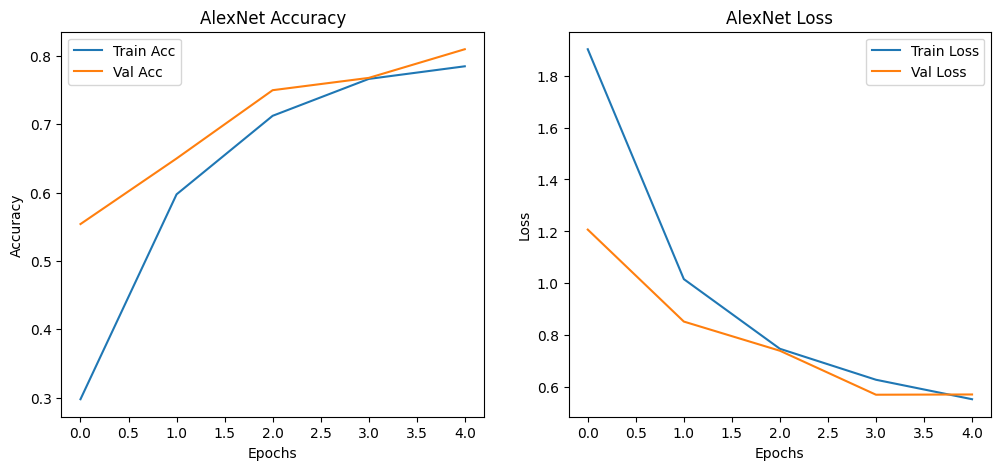

In [8]:
# Plot training history
def plot_history(history, model_name="Model"):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_history(history, "AlexNet")